In [194]:
import numpy as np
from pandas.io.parsers import read_csv

#from google.colab import drive
#drive.mount('/content/drive')
#valores=read_csv("/content/drive/MyDrive/AA/p4/data4.csv",header=None).to_numpy()

valores = read_csv('data4.csv', header=None).to_numpy()

In [195]:
#seleccionar 80 filas aleatorias para entrenamiento de valores
np.random.shuffle(valores)
valores_ent = valores[:70, :]
valores_test = valores[70:100, :]
X = valores_ent[:, 0:2]
Y = valores_ent[:,2]

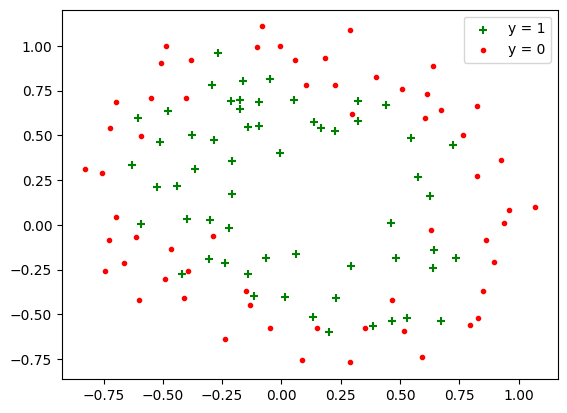

In [196]:
import matplotlib.pyplot as plt
X_aux = valores[:, 0:2]
Y_aux = valores[:,2]

pos = np.where(Y_aux == 1)
plt.scatter(X_aux[pos,0], X_aux[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(Y_aux == 0)
plt.scatter(X_aux[neg,0], X_aux[neg,1], marker='.', c='r', label = "y = 0")

plt.legend()
plt.show()


In [197]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6)
XX = poly.fit_transform(X)

In [198]:
def func_coste(y_hat, Y, L):
    Y_resd=Y-y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/(2*len(Y)) + L*np.sum(np.dot(w.T,w))/(2*len(Y))

def func_sigmoide(w,b,x):
    z = np.dot(x,w)+b
    return 1/(1+np.exp(-z))

def funcion_grad(X, y, w, b, L):
    y_hat = func_sigmoide(w,b,X)
    gb = (np.sum(y_hat-y))/len(y)                                    #No estabamos dividiendo por len(y) 
    gw = (1/len(y)) * np.dot((y_hat-y),X) + L*w/len(y)
    return gw, gb

def funcion_grad_desc(X, y, alpha, num_iter, L):
    w = np.zeros(X.shape[1])
    b = 0
    for i in range(num_iter):
        gw, gb = funcion_grad(X, y, w, b, L)
        w = w - alpha*gw
        b = b - alpha*gb
    return w, b

w, b = funcion_grad_desc(XX, Y, 0.001, 100000, 1)

In [199]:
def funcion_prediccion(w, b, X):
    y_hat = func_sigmoide(w,b,X)
    return y_hat

XX_test = poly.fit_transform(valores_test[:, 0:2])
y_hat_test = func_sigmoide(w, b, XX_test)
y_hat_test = np.where(y_hat_test >= 0.5, 1, 0)

print("Accuracy: ", np.sum(y_hat_test == valores_test[:, 2])/len(valores_test[:, 2]))

Accuracy:  0.8666666666666667


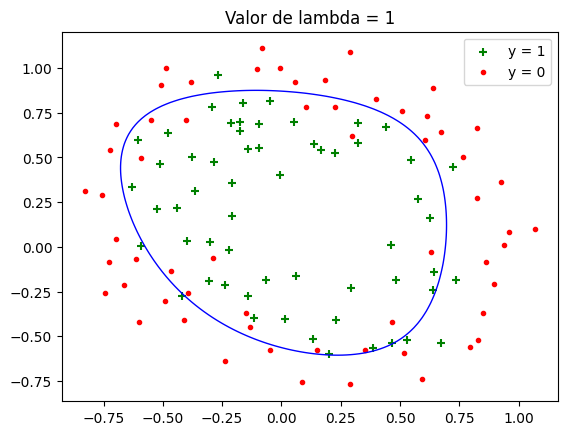

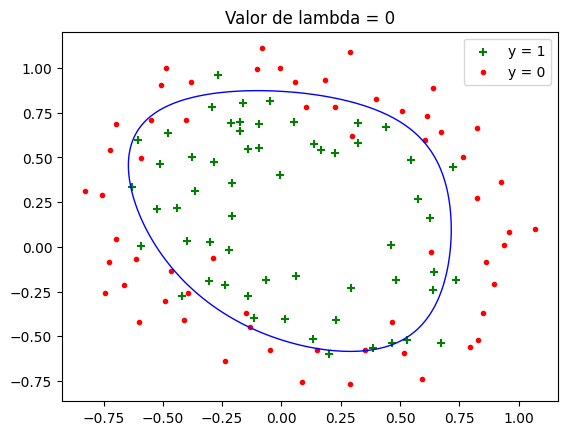

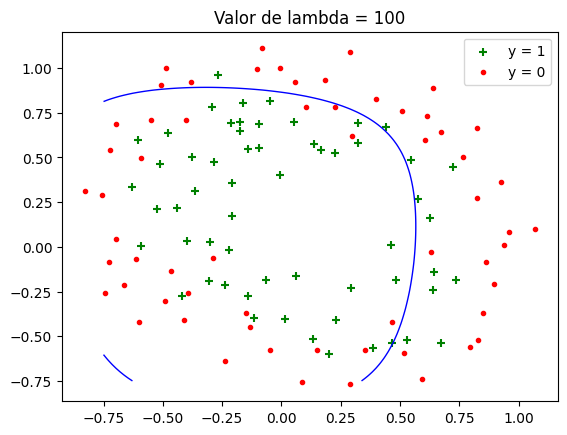

In [200]:
import matplotlib.pyplot as plt

def non_linear_decision_boundary(w, b, X):
    x1 = np.linspace(-0.75, 1.0, 100)
    x2 = np.linspace(-0.75, 1.0, 100)
    x1, x2 = np.meshgrid(x1, x2)
    X = np.c_[x1.ravel(), x2.ravel()]
    XX = poly.fit_transform(X)
    y_hat = func_sigmoide(w, b, XX)
    y_hat = y_hat.reshape(x1.shape)
    return x1, x2, y_hat

def pintar_grafica(Lambda = 1):
    pos = np.where(Y_aux == 1)
    plt.scatter(X_aux[pos,0], X_aux[pos,1], marker='+', c='g', label = "y = 1")

    neg = np.where(Y_aux == 0)
    plt.scatter(X_aux[neg,0], X_aux[neg,1], marker='.', c='r', label = "y = 0")

    w, b = funcion_grad_desc(XX, Y, 0.001, 100000, Lambda)
    x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
    plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')
    plt.legend()
    plt.title('Valor de lambda = ' + str(Lambda) )
    plt.show()

pintar_grafica(1)
pintar_grafica(0)
pintar_grafica(100)

In [201]:
i= 0
j = 0
accs = np.zeros(100)
XX_test = poly.fit_transform(valores_test[:, 0:2])

while i < 100:
    w,b = funcion_grad_desc(XX, Y, 0.001, 100000, i)
    i += 1
    y_ht = func_sigmoide(w, b, XX_test)
    y_ht = np.where(y_ht >= 0.5, 1, 0)
    accs[j] = np.sum(y_ht == valores_test[:, 2])/len(valores_test[:, 2]) * 100
    j += 1

In [202]:
accs

array([86.66666667, 86.66666667, 90.        , 83.33333333, 83.33333333,
       80.        , 80.        , 76.66666667, 73.33333333, 73.33333333,
       73.33333333, 73.33333333, 70.        , 70.        , 70.        ,
       70.        , 70.        , 70.        , 70.        , 70.        ,
       70.        , 70.        , 70.        , 70.        , 70.        ,
       70.        , 70.        , 70.        , 70.        , 70.        ,
       70.        , 70.        , 70.        , 70.        , 70.        ,
       70.        , 70.        , 70.        , 70.        , 70.        ,
       70.        , 70.        , 70.        , 70.        , 70.        ,
       70.        , 70.        , 70.        , 70.        , 70.        ,
       70.        , 70.        , 70.        , 70.        , 70.        ,
       70.        , 70.        , 70.        , 70.        , 70.        ,
       70.        , 70.        , 70.        , 70.        , 70.        ,
       70.        , 70.        , 70.        , 70.        , 70.  

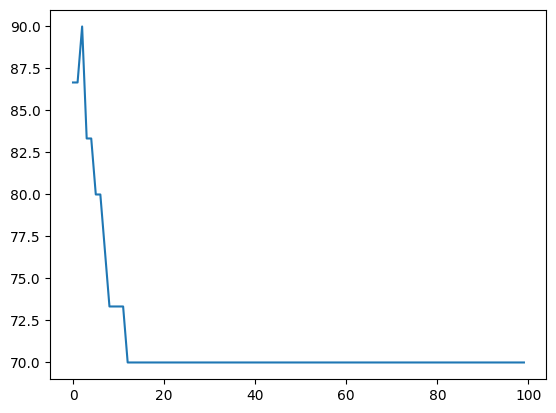

In [203]:
x1 = np.array([i for i in range(100)])
plt.plot(x1, accs)